# Part II - Investigation into the usage of ford bikes at the San Francisco Area.
## by Goodness Folayan

### Table of Contents

<ul>
<li><a href="#investigation">Investigation Overview</a></li>
<li><a href="#Dataset Overview">Dataset Overview</a></li>
<li><a href="#Distribution of Duration">Distribution of Duration</a></li>
<li><a href="#Distribution of Ages">Distribution of Ages</a></li>
<li><a href="#Distribution by date and time">Distribution by date and time</a></li>
<li><a href="#Duration vs gender, user type, bike share and days of the week">Duration vs gender, user type, bike share and days of the week</a></li>
<li><a href="#Defining characteristics of the  users">Defining characteristics of the  users</a></li>
</ul>

<a id= "investigation"></a>
## Investigation Overview


> In this investigation, I initially wanted to look at the influencers of the bikes duration with focus on age, start time, member gender, user type, bike sharing, and day of the week. 



<a id= "Dataset Overview"></a>
## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. With over 180,000 entries of bike data taken in the month of February 2019 consisting of features such as start and end dates and time, birth years of the users and 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bikes = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
cat_vars = ['member_gender', 'user_type', 'bike_share_for_all_trip']
num_vars = ['duration_sec','member_birth_year']

In [4]:
# Convert start time and end time to datetime types and birth year to integer
bikes.dropna(inplace=True)
bikes['start_time'] = pd.to_datetime(bikes.start_time, format='%Y%m%d %H:%M:%S')
bikes['end_time'] = pd.to_datetime(bikes.end_time, format='%Y%m%d %H:%M:%S')
bikes['member_birth_year'] = bikes.member_birth_year.astype(int)

In [5]:
#Data wrangling, removing entries with inconsistent or missing data
# Drop unnecessary columns like start and end station's id,longitude and latitude  data
bikes.drop(columns=['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude','start_station_id','end_station_id'], axis = 1, inplace = True)


<a id= "Distribution of Duration"></a>
## Distribution of Duration

Duration of the bike trips has a wide range of values from about 1min to almost a day (61s to 84500s). Plotted on a logarithmic scale, the distribution takes on a symmetric, unimodal shape.

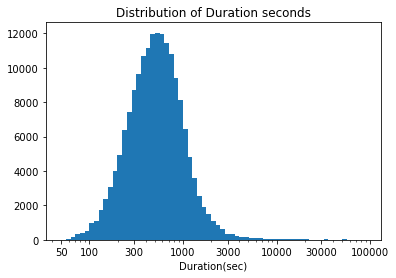

In [6]:
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10,x)
    
# Apply the transformation
log_binsize = 0.05
bins = 10** np.arange(1.7,np.log10(bikes.duration_sec.max())+log_binsize, log_binsize)
plt.hist(bikes.duration_sec, bins=bins)
plt.xscale('log')
ticks = [50,100,300,1000,3000,10000,30000,100000]
label = ['{}'.format(v) for v in ticks]
plt.xlabel('Duration(sec)')
plt.xticks(ticks, labels=label)
plt.title('Distribution of Duration seconds');

<a id= "Distribution of Ages"></a>
## Distribution of Ages

> The duration is a function of the ages. Where the least age is 20years old.
A large portion of the bike users fall between late 20's to early 30's. Gradually decreasing as the age increases.
We derive the age column from the member_birth_year column

We can see that the mode of the ages occurred between late 20's to early 30's years of age for bike users, peaking at 30 - 32 years of age. 

I'll move over to the other categorical variables of interest in the dataset:member_gender, user_type, and bike_share_for_all_trip

A good idea is to take out the rows of data with incorrectly filled member_birth_years (ages above 80years) since this will constitute outliers and constitue possible distruption of our data


In [7]:
# Define the age column
bikes['age'] = 2019 - bikes['member_birth_year']
num_vars.append('age')


In [8]:
bikes_age_outliers = bikes.loc[bikes.age>80]


In [9]:
#Taking out the above data
bikes = pd.concat([bikes, bikes_age_outliers]).drop_duplicates(keep=False)

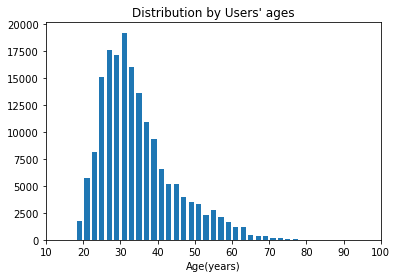

In [10]:
#Plot the age column data on a histogram
binsize = 2
bins = np.arange(0, bikes.age.max()+binsize,binsize)

#plt.figure(figsize = [20,10])
# Histogram on the left, normal distribution
plt.hist(data = bikes, x = 'age', bins = bins, rwidth = 0.7)
tick = [10,20,30,40,50,60,70,80,90,100]
label = ['{}'.format(v) for v in tick]
plt.xticks(ticks = tick, labels = label)
plt.xlim((10,100))
plt.xlabel('Age(years)')
plt.title("Distribution by Users' ages" )
plt.show()

<a id= "Distribution by date and time"></a>
## Distribution by date and time
We need to examine the distribution by days of the week and the start time of the day as they both influence the duration.
Given that there are 24hrs in the day but 12hrs are for daylight and 12hrs for night time.
The distribution for the time of usage is bimodal occurring at 8am and 5pm.
For most institutions, these are the start and end times, respectively.
Some feature engineering was necessary to derive the hours of the day from the start time feature. While weekends have lesser usage than work days (Mondays to Fridays)

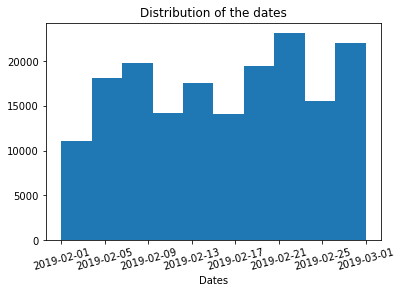

In [11]:
plt.hist(bikes.start_time)
plt.xticks(rotation = 15)
plt.xlabel('Dates')
plt.title('Distribution of the dates');

Proceeding to derive the "date", "time" and "day of the week" columns from the start_time column:


In [12]:
#Split the start_time and end_time columns to the date columns 
bikes['start_date'] = pd.to_datetime(bikes['start_time']).dt.date
bikes['end_date'] = pd.to_datetime(bikes['end_time']).dt.date

#Converting the time column to datetime
bikes['start_time'] = pd.to_datetime(bikes['start_time']).dt.time
#convert the start_date and end_date new columns to the datetime format
bikes.start_date = pd.to_datetime(bikes.start_date)
bikes.end_date = pd.to_datetime(bikes.end_date)
#Remove microseconds
bikes.start_time = bikes.start_time.apply(lambda x : x.replace(microsecond = 0))
#Convert start_time column to datetime
bikes.start_time = pd.to_datetime(bikes.start_time, format = '%H:%M:%S')  
bikes.start_time = pd.to_datetime(bikes.start_time).dt.time
#Insert dayname column
bikes['day_name'] = bikes.start_date.dt.day_name()

In [13]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174760 entries, 0 to 183411
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174760 non-null  int64         
 1   start_time               174760 non-null  object        
 2   end_time                 174760 non-null  datetime64[ns]
 3   start_station_name       174760 non-null  object        
 4   end_station_name         174760 non-null  object        
 5   bike_id                  174760 non-null  int64         
 6   user_type                174760 non-null  object        
 7   member_birth_year        174760 non-null  int32         
 8   member_gender            174760 non-null  object        
 9   bike_share_for_all_trip  174760 non-null  object        
 10  age                      174760 non-null  int32         
 11  start_date               174760 non-null  datetime64[ns]
 12  end_date        

In [14]:
bikes.reset_index(inplace=True)
bikes.drop(columns='index', inplace=True)
bikes.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,start_date,end_date,day_name
0,52185,17:32:10,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984,Male,No,35,2019-02-28,2019-03-01,Thursday
1,61854,12:13:13,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No,47,2019-02-28,2019-03-01,Thursday
2,36490,17:54:26,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989,Other,No,30,2019-02-28,2019-03-01,Thursday
3,1585,23:54:18,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes,45,2019-02-28,2019-03-01,Thursday
4,1793,23:49:58,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959,Male,No,60,2019-02-28,2019-03-01,Thursday


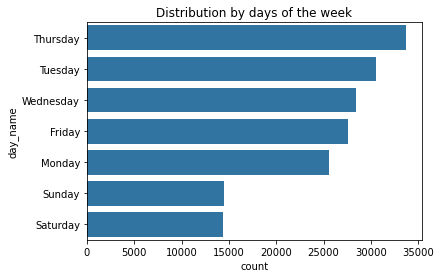

In [15]:
day_order = bikes['day_name'].value_counts().index
#plotting the days distribution by order
base_color = sb.color_palette()[0]
sb.countplot(data = bikes, y = 'day_name', order = day_order, color = base_color)
plt.title('Distribution by days of the week');

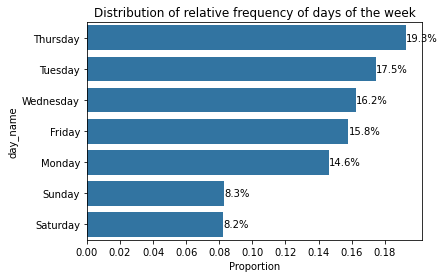

In [16]:
bikes_counts = bikes['day_name'].value_counts()
## To get relative frequency
no_of_bikes = bikes.shape[0]
max_day = bikes_counts[0]
max_proportion = max_day/no_of_bikes
max_proportion
## To get the ticks spacing
x_ticks_spacing = np.arange(0, max_proportion, 0.02)
tick_names = ['{:.2f}'.format(v) for v in x_ticks_spacing]
## Plot the graph
sb.countplot(data = bikes, y = 'day_name', order = day_order, color = base_color)
plt.xticks(x_ticks_spacing * no_of_bikes, tick_names)
plt.xlabel('Proportion')
plt.title('Distribution of relative frequency of days of the week')

for i in range(len(bikes_counts)):
    count = bikes_counts[i]
    pct_string = '{:.1f}%'.format(100*count/no_of_bikes)
    plt.text(count+1,i, pct_string, va = 'center');

In [17]:
#Let's derive the hours, minutes and seconds columns from the start_time column
#Convert the start_time column to a list of lists
bikes['start_time'] = bikes['start_time'].astype(str)
bikes['start_time'] = bikes['start_time'].str.split(":")
# new dataframe from the column of lists
split_df = pd.DataFrame(bikes['start_time'].tolist(), columns=['hours', 'minutes', 'seconds'])
# concatenate df and split_df
bikes = pd.concat([bikes, split_df], axis =1)
# drop rows of missing data
bikes.dropna(inplace=True)

In [18]:
bikes.reset_index(inplace=True)
bikes.drop(columns='index', inplace=True)

In [19]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174760 entries, 0 to 174759
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174760 non-null  int64         
 1   start_time               174760 non-null  object        
 2   end_time                 174760 non-null  datetime64[ns]
 3   start_station_name       174760 non-null  object        
 4   end_station_name         174760 non-null  object        
 5   bike_id                  174760 non-null  int64         
 6   user_type                174760 non-null  object        
 7   member_birth_year        174760 non-null  int32         
 8   member_gender            174760 non-null  object        
 9   bike_share_for_all_trip  174760 non-null  object        
 10  age                      174760 non-null  int32         
 11  start_date               174760 non-null  datetime64[ns]
 12  end_date        

In [20]:
bikes.hours.value_counts().index

Index(['17', '08', '18', '09', '16', '07', '19', '15', '12', '13', '10', '14',
       '11', '20', '21', '06', '22', '23', '00', '05', '01', '02', '04', '03'],
      dtype='object')

''

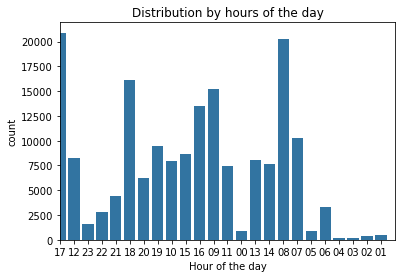

In [21]:
#plotting the days distribution by order
base_color = sb.color_palette()[0]
sb.countplot(data = bikes, x = 'hours', color = base_color)
plt.xlim([0,24])
plt.title('Distribution by hours of the day')
plt.xlabel('Hour of the day')
;

The peak of usage during the week falls on Thursday, while weekends bear the least entries. This is to suggest that the bikes were used less for recreational purposes and mostly for work related purposes.

<a id= "Duration vs gender, user type, bike share and days of the week"></a>
## Duration vs gender, user type, bike share and days of the week
The plot of data using violinplots beside the boxplot on all the data shows very interesting information. Applying a log transform to the duration, we see that the concentration of the duration of the bike rides typically falls between 5mins to 20mins across all the categorical data types - member gender, day of the week, bike share during the trip and user type. The customer performed slightly better than the subscriber for the user type, while Females and other under the member gender types outperformed the male variable. For users that shared their Bikes during the trip, they appeared to have longer duration than those that didn't. 

Weekends does appear to have an elongated violinplot for weekends( Saturday and Sunda) indicating that longer durations was the norm for the weekends than for the other workdays.

In [22]:
num_vars_1 = ['hours']

cat_vars_1 = ['day_name']

num_vars = num_vars + num_vars_1
cat_vars = cat_vars + cat_vars_1

num_vars,cat_vars

(['duration_sec', 'member_birth_year', 'age', 'hours'],
 ['member_gender', 'user_type', 'bike_share_for_all_trip', 'day_name'])

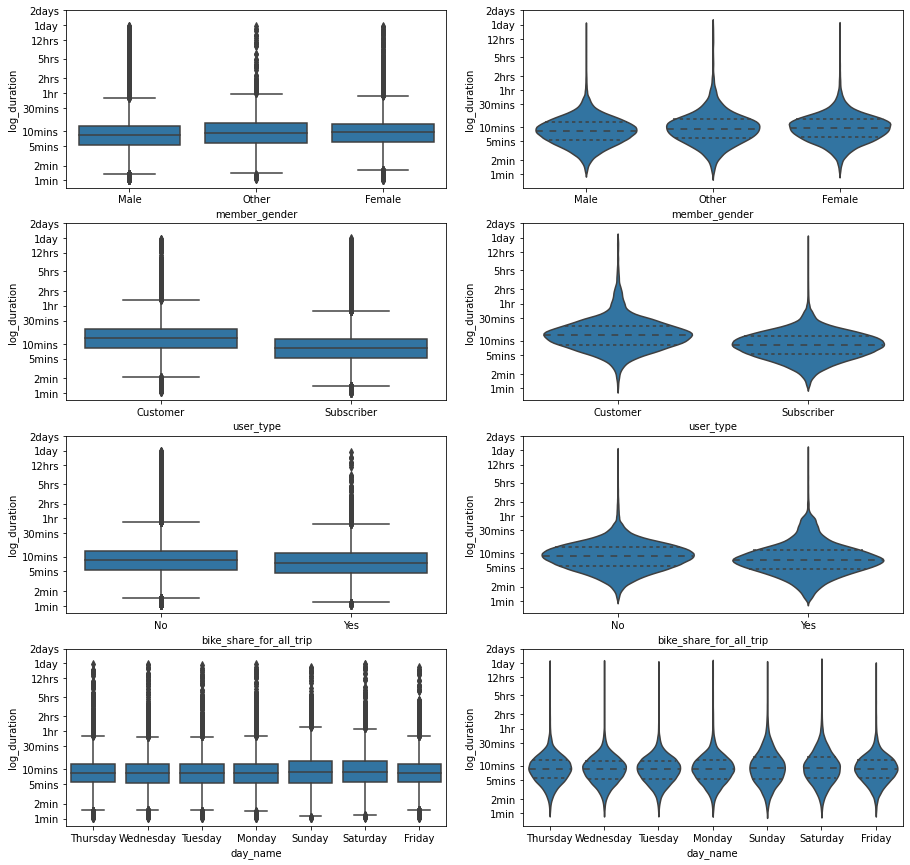

In [23]:
#Creating a column of log_duration with a log transform applied to the duration column
bikes['log_duration'] = bikes['duration_sec'].apply(log_trans)
# plot the categorical variables against duration
#bike_samp = bikes.sample(n= 10000, replace = False)
fig, ax = plt.subplots(ncols = 2, nrows = 4 , figsize = [15,15])

for i in range(len(cat_vars)):
    var = cat_vars[i]
    tick = np.array([60, 120, 300, 600, 1800, 3600,7200,18000,43200,86400,172800])
    label = ['1min', '2min', '5mins', '10mins', '30mins', '1hr','2hrs','5hrs','12hrs','1day','2days']
    sb.boxplot(data = bikes, x = var, y = 'log_duration', ax = ax[i,0],
               color = base_color)
    ax[i,0].set_yticks(log_trans(tick))
    ax[i,0].set_yticklabels(label)
    sb.violinplot(data = bikes, x = var, y = 'log_duration', ax = ax[i,1],
               color = base_color, inner = 'quartile')
    ax[i,1].set_yticks(log_trans(tick))
    ax[i,1].set_yticklabels(label)

plt.show()

<a id= "Defining characteristics of the  users"></a>
## Defining characteristics of the  users 


In [24]:
#converting hours to int type
bikes.hours = bikes.hours.astype(int)
#Remove duration_sec from num_vars
num_vars.remove('duration_sec')
num_vars.remove('member_birth_year')

In [25]:
num_vars

['age', 'hours']

In [26]:
cat_vars

['member_gender', 'user_type', 'bike_share_for_all_trip', 'day_name']

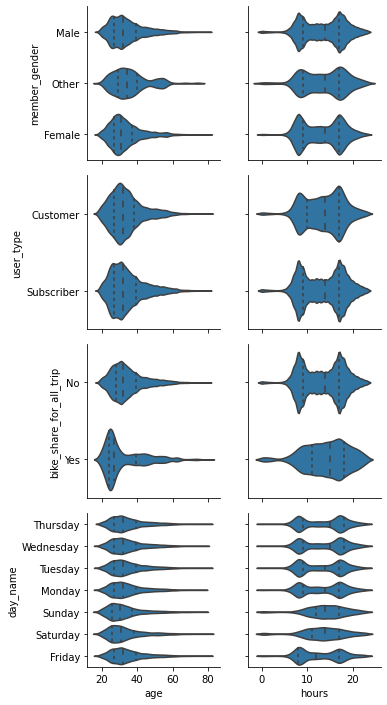

In [27]:
#Having accounted for the duration_sec variable previously:
g = sb.PairGrid(data = bikes, x_vars=num_vars, y_vars=cat_vars, )
g.map(sb.violinplot, inner = 'quartile', color = base_color);

Interesting visualizations we see from the plot matrices. We can see that the member gender for all age brackets fall between the 20 to 40 age bracket with a considerable amount of "other" under the gender types between the 40 to 60 age bracket. The time of the day as we have discussed previously is quite bimodal at the 8am and 5pm hours of the day respectively. The "Customer" user type favours the 5pm time of the day than the other 8am time of the day while the subscriber type which is more predominant, favours both as equally. It can be suggested then that non subscribers typically favour the end the day bike usage than the start of the day.
All the days of the week except weekends(Saturday and Sundays) followed a similar pattern of usage i.e favouring the 5am or 8pm time of the day usage. Whereas the weekends occurred mostly at mid-day.

Also worth mentioning is that those that did not share their bikes for the duration of the trips were slightly older than those that did. What's more fascinating is that the ones that didn't favoured strongly the 8am and 5pm time of the day usage while those that did were more or less spread out on the time of the day. 

